# 📊 Previsão de Churn de Clientes - Telco

Este projeto usa dados de uma empresa de telecomunicações fictícia para prever quais clientes têm maior probabilidade de cancelarem o serviço (churn), usando técnicas de análise de dados e machine learning.


## 🎯 Objetivo

Criar um modelo preditivo de churn que ajude a empresa a identificar clientes com risco de saída e agir proativamente para retenção. Vamos explorar o dataset, tratar os dados, construir modelos de machine learning e visualizar os resultados.

## 🧭 Etapas do Projeto

1. Análise exploratória dos dados
2. Limpeza e pré-processamento
3. Engenharia de variáveis
4. Modelagem preditiva
5. Avaliação de desempenho
6. Conclusões e próximos passos


## 📥 Importação das bibliotecas e leitura dos dados


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de visualização
sns.set(style="whitegrid")
%matplotlib inline

# Carregando os dados
df = pd.read_csv('../data/telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 🧹 Limpeza e preparação dos dados

Aqui tratamos valores ausentes, removemos colunas irrelevantes e preparamos os dados para análise, incluindo a codificação de variáveis categóricas.


In [3]:
# Verificar as primeiras linhas
df.head()

# Verificar informações gerais
df.info()

# Corrigir valores nulos e tipos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Remover colunas irrelevantes
df.drop(['customerID'], axis=1, inplace=True)

# Converter 'Churn' para binário (target)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verificar colunas categóricas
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Colunas categóricas:", cat_cols)

# Converter variáveis categóricas com get_dummies
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Verificar forma final
print(f"Formato final dos dados: {df_encoded.shape}")
df_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


C:\Users\14927568733\AppData\Local\Temp\ipykernel_10136\3855601824.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


KeyError: "['customerID'] not found in axis"

## ✂️ Separação entre treino e teste

Dividimos os dados em duas partes: uma para treinar o modelo e outra para testá-lo. Isso garante que possamos avaliar a capacidade de generalização do modelo em dados que ele nunca viu.


In [4]:
from sklearn.model_selection import train_test_split

# Separar variáveis independentes (X) e target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Separar em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 🤖 Treinamento do modelo

Usaremos uma Random Forest, um modelo robusto e eficaz que combina várias árvores de decisão para melhorar a precisão e evitar overfitting.


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📈 Avaliação do modelo

Vamos medir o desempenho do modelo com métricas como acurácia, precisão, recall e F1-score. Também veremos a matriz de confusão para visualizar os acertos e erros.


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.77      0.79      0.78      1409



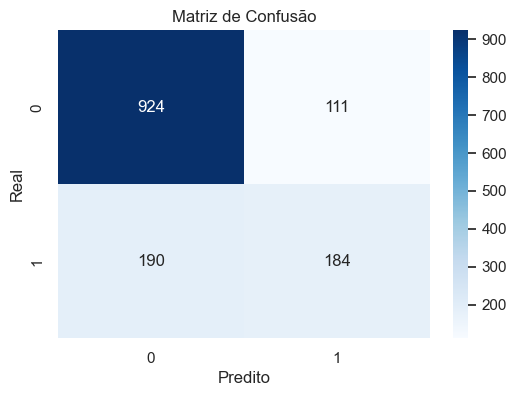

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Previsões
y_pred = model.predict(X_test)

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


## 💡 Importância das Variáveis

Vamos visualizar quais variáveis mais influenciam o modelo. Isso ajuda a interpretar o modelo e entender os principais fatores de churn.


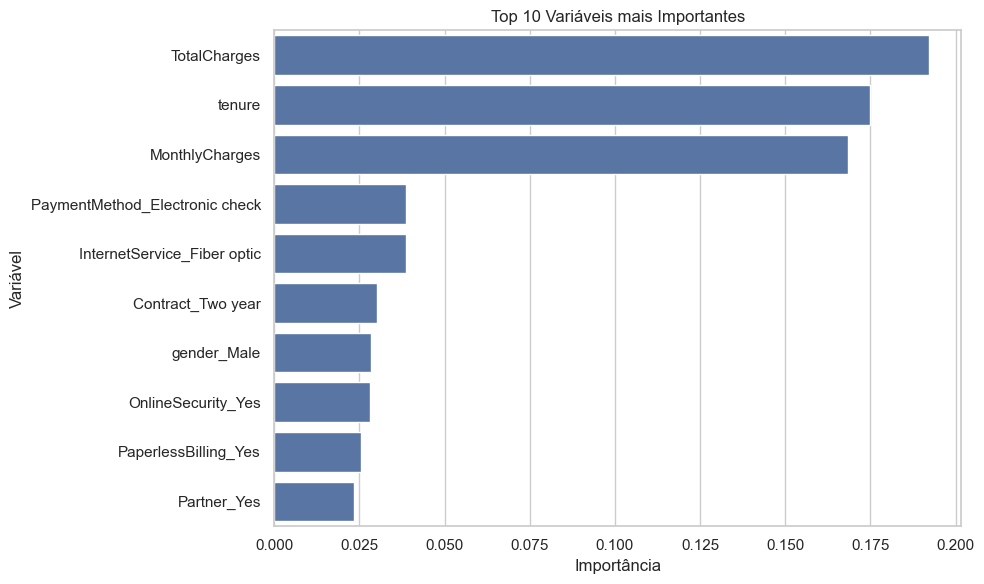

In [7]:
import numpy as np

# Importâncias das features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10])
plt.title('Top 10 Variáveis mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


## 💾 Exportação do Modelo e das Predições

Exportamos o modelo treinado e salvamos um arquivo com as predições. Isso nos permite usar o modelo fora do notebook, como em ferramentas de BI ou aplicações.


In [9]:
import joblib

import os
import joblib

# Criar pasta se não existir
os.makedirs('exports', exist_ok=True)

# Salvar o modelo
joblib.dump(model, 'exports/model_churn_rf.joblib')


# Adicionar previsões ao DataFrame de teste
df_test = X_test.copy()
df_test['Churn_Real'] = y_test.values
df_test['Churn_Predito'] = y_pred

# Exportar para CSV
df_test.to_csv('exports/predicoes_churn.csv', index=False)
